# Prepare rules for the dataset
- **Try different values of support and confidence. Observe the change in number of rules for different support,confidence values**
- **Change the minimum length in apriori algorithm**
- **Visulize the obtained rules using different plots**
___

Association rule learning is used to find interesting relationships between items in large datasets. One application of this learning is for Market Basket Analysis, where the goal is to find out shopping patterns for items bought which informs us on product placement and discount rates to optimize sale and profit. Some metrics used to evaluate the quality and relevance of association rules include support, confidence, lift, leverage, and conviction.

- Support: Support is the percentage of transactions in the dataset that contain both the antecedent and the consequent. It measures the frequency of occurrence of the rule in the dataset. Higher support values indicate that the rule is more frequently occurring and thus, more important.

- Confidence: Confidence is the percentage of transactions containing the antecedent that also contain the consequent. It measures the strength of the relationship between the antecedent and the consequent. Higher confidence values indicate that the rule is more reliable.

- Lift: Lift is defined as the ratio of the observed support of the two items occurring together to the expected support if they were independent of each other. It compares the likelihood of two items co-occurring together to the likelihood of them occurring separately. A lift value greater than 1 indicates a positive correlation, a value less than 1 indicates a negative correlation, and a value equal to 1 indicates independence.

- Leverage: Like Lift, Leverage quantifies the difference between the observed support of two items occurring together and the expected support if they were independent of each other. It provides a measure of how much the occurrence of one item influences the occurrence of another item. A leverage value greater than 0 indicates a positive correlation, a value less than 0 indicates a negative correlation, and a value equal to 0 indicates independence. Leverage is a stricter measure of association than lift. Leverage helps identify rare and meaningful relationships, while lift helps identify frequent and interesting ones.

- Conviction: Conviction can be interpreted as the ratio of the expected frequency of incorrect predictions made by the rule to the actual frequency of incorrect predictions. It measures the degree of dependence between the antecedent and the negation of the consequent. Higher conviction values indicate that the rule is more interesting and thus, more valuable.

## Exploratory Data Analysis

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
book = pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


The data seems to have only 0 and 1 values, so it is already processed. Let us confirm this :

In [4]:
book.nunique()

ChildBks     2
YouthBks     2
CookBks      2
DoItYBks     2
RefBks       2
ArtBks       2
GeogBks      2
ItalCook     2
ItalAtlas    2
ItalArt      2
Florence     2
dtype: int64

In [5]:
# Checking in there are any na values in the data
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

There are no na values in the data

## Association Rule Learning

- As we want to check number of rules for different support and confidence values, let us run apriori algorithm, with the least support possible, which is 1 out of the total number of transactions i.e. 1/2000. 
- We also want to check the effect of changing the minimum length of the itemset. For now, we will let it be None which means all lengths are allowed

In [6]:
# Using Apriori Algorithm to get all itemsets above the minimum support of 1 transaction
ap = apriori(book, use_colnames=True, min_support= 1/2000)

In [7]:
# Using association_rules function to get all association rules from the itemsets generated by apriori.
# The default metric is 'confidence'. Let's set its minimum threshold to 0
rules = association_rules(ap, min_threshold = 0)

In [8]:
rules.shape

(173052, 9)

We have 1,73,052 total possible rules for the lowest values of support and confidence

In [9]:
# Features of the rules
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

Let us make a function to get rules above a specific support and confidence : 

In [10]:
def get_rules(support_threshold, confidence_threshold):
    # Returns rules that comply with the given minimum support and confidence thresholds
    return rules[(rules.support > support_threshold) & (rules.confidence > confidence_threshold)]

We have support and confidence of each rule. We will use filters to get the rules for our desired support and confidence

In [11]:
# Finding the maximum support value in the dataset
max_support = rules.support.max() * 2000
print("Maximum Support : ", max_support)

Maximum Support :  512.0


In [12]:
# Finding the maximum confidence value in the dataset
max_confidence = rules.confidence.max()
print("Maximum Confidence : ", max_confidence)

Maximum Confidence :  1.0


In [13]:
# Setting range for unique support values and 1000 confidence values
supports = np.arange(1,max_support + 1)
confidences = np.arange(0,max_confidence,0.001)

# Creating meshgrid from support and confidence values
X, Y = np.meshgrid(supports, confidences)

In [14]:
# Creating a dataframe of number of rules of all support and confidence values replicating the shape of the meshgrid
# and replacing 0 with np.nan to exclude 0 from the plot
n_rules = pd.DataFrame([[get_rules(support/2000, confidence).shape[0] for support in supports] for confidence in confidences])
n_rules.replace({0:np.nan}, inplace = True)

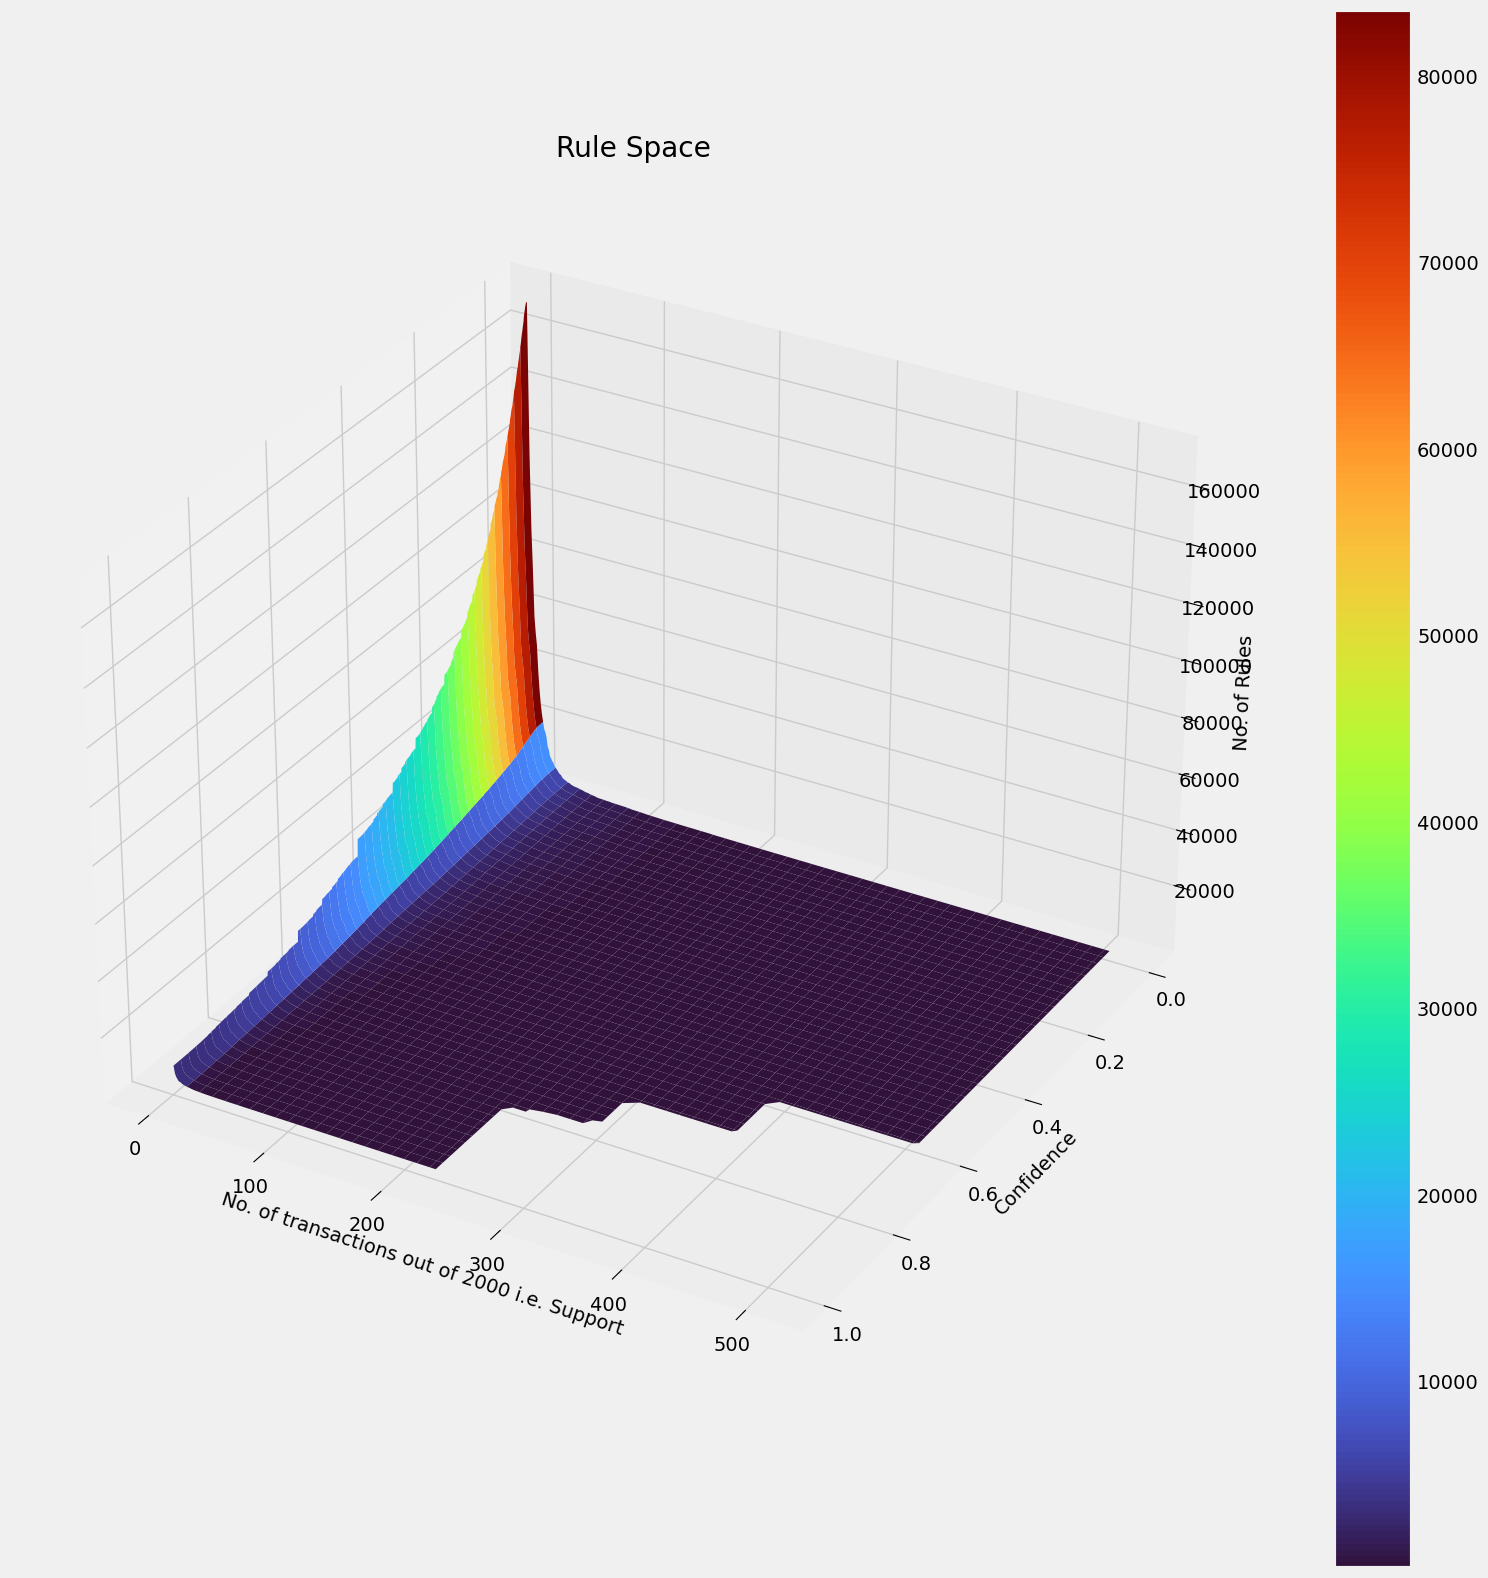

In [15]:
# Plotting 3d surface graph for number of rules for all support and confidence values

# Using style 'fivethirtyeight' to improve visuals of the plot
plt.style.use('fivethirtyeight')
# Creating a figure object and setting its size to 16x16
fig = plt.figure(figsize = (16,16))
# Setting axes for a 3d plot
ax = fig.add_subplot(projection='3d')
# Creating surface object from number of rules as height for each support, confidence pair
surf = ax.plot_surface(X, Y, n_rules, cmap = 'turbo')
# Creating a legend for the color of the surface
cbar = plt.colorbar(surf)
ax.set_xlabel('No. of transactions out of 2000 i.e. Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('No. of Rules')
ax.set_title('Rule Space')
# Inverting y axis so that the origin is at the inner corner
ax.invert_yaxis()
plt.tight_layout()
plt.show()

We can see that we get rules only upto a little more than 25% support. The number of rules is extremely high for small support and confidence. As support increases, the number of rules drastically drops, while for confidence, it gradually drops.

However, as the scale of the Z axis i.e. number of rules is extremely high, the graph is very skewed. We will apply log transformation to the Z values for better visualization

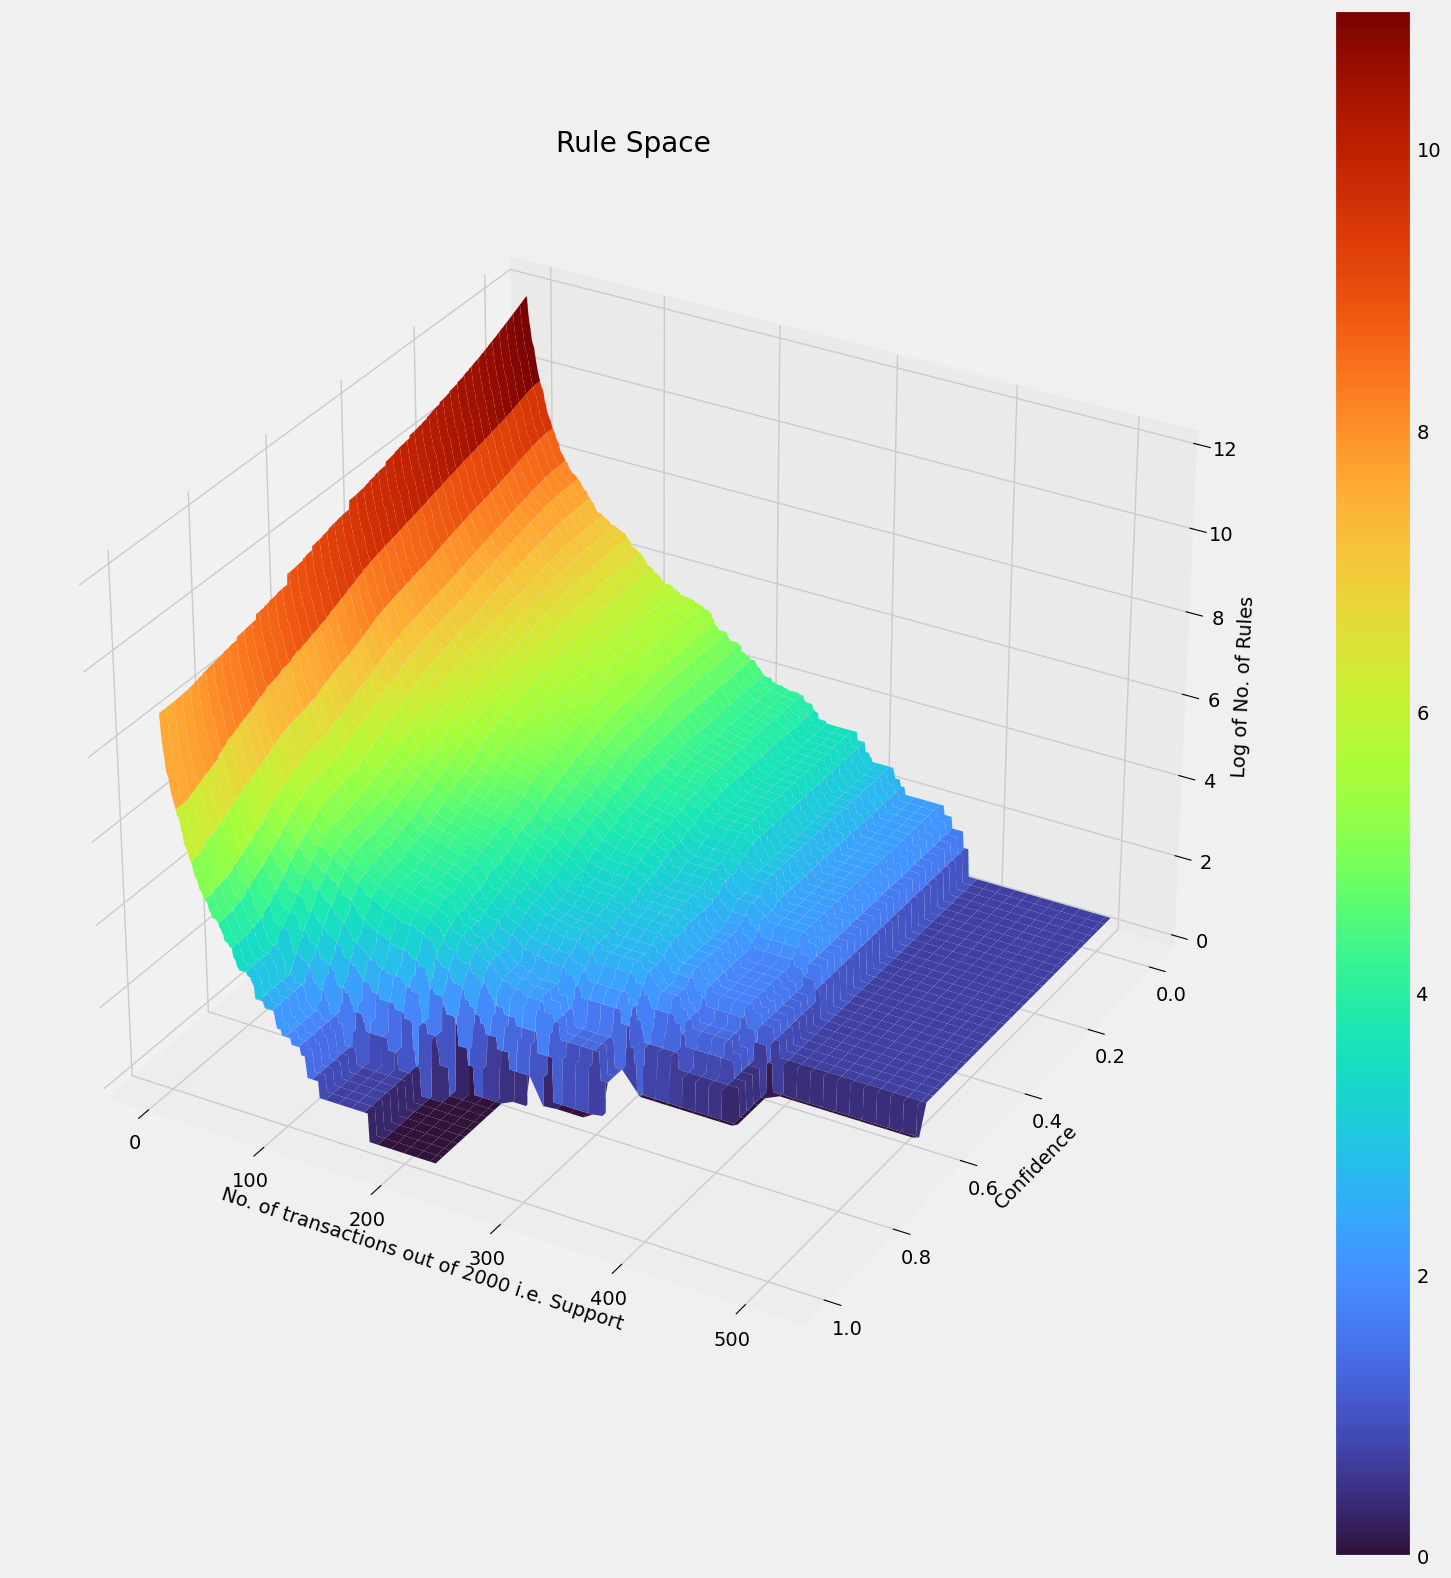

In [16]:
n_rules_log = np.log(n_rules)
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, n_rules_log, cmap = 'turbo')
cbar = plt.colorbar(surf)
ax.set_xlabel('No. of transactions out of 2000 i.e. Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Log of No. of Rules')
ax.set_title('Rule Space')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

This gives us a better understanding of the rise in number of rules for rise in support and confidence. While low confidence and low support generates a lot of rules, we ideally want few meaningful rules with high support and high confidence. We have some rules for 20-25% Support and upto 60% Confidence, that could be potentially useful. There are also rules with 5-10% Support and very high Confidence of 80-100% that can be potentially useful. For a large number of items, we can't expect support to be high, but we want confidence to be high regardless.

## High Support / Low Confidence

In [17]:
# Rules for minimum Support 22.5% and Confidence 50%
get_rules(0.225, 0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


For 25% Support and 60% confidence, we get customer's who buy children's books and cookbooks together. Note the confidence is 50%, meaning of all the customers who buy children's books, 50% of them buy cookbooks as well, and vice-verse. The lift value of 1.4 also gives us a sense of how closely the two items are related. 0 lift means independence and higher values mean high correlation

In [18]:
# Rules for minimum Support 19% and Confidence 50%
get_rules(0.19, 0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
10,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
44,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


Geography Books ---> Children's Books   (Support : 19.5%   /   Confidence : 70.6%)  
Geography Books ---> Cookbooks          (Support : 19.2%   /   Confidence : 69.7%)  
We get two more rules with higher support and high confidence

In [19]:
# Rules for minimum Support 15% and Confidence 50%
get_rules(0.15, 0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
10,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
20,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
39,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
40,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556


We get more rules for higher support. As expected they are itemsets with single items for antecedents and consequents. Most have consequents as Children's books or cookbooks.

In [20]:
# Rules for minimum Support 10% and Confidence 50%
s10c50 = get_rules(0.1, 0.5)

#### Visualizations

<Axes: xlabel='support', ylabel='confidence'>

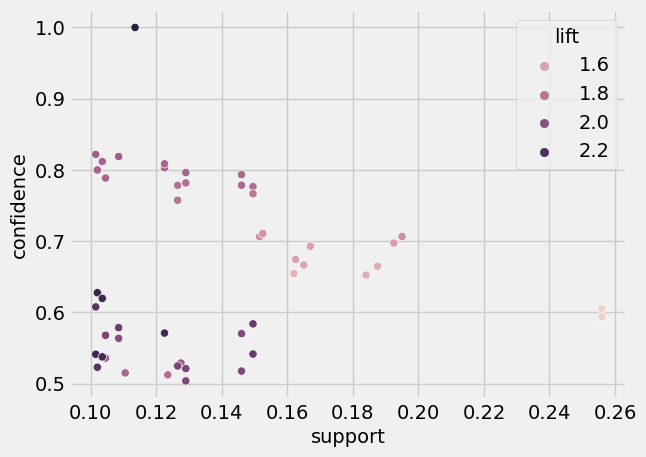

In [21]:
# Scatterplot of rules for minimum support of 10% and minimum confidence of 50%
sns.scatterplot(s10c50, x = 'support', y = 'confidence', hue = 'lift')

Rules with low confidence of 50-60% have higher lift (i.e. correlation or interdependence). Also, one rule with 100% confidence has high lift

In [22]:
# Finding the one rule with 100% confidence
s10c50[s10c50.confidence == 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
46,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf


Italian and general Cookbooks have 100% confidence and high lift

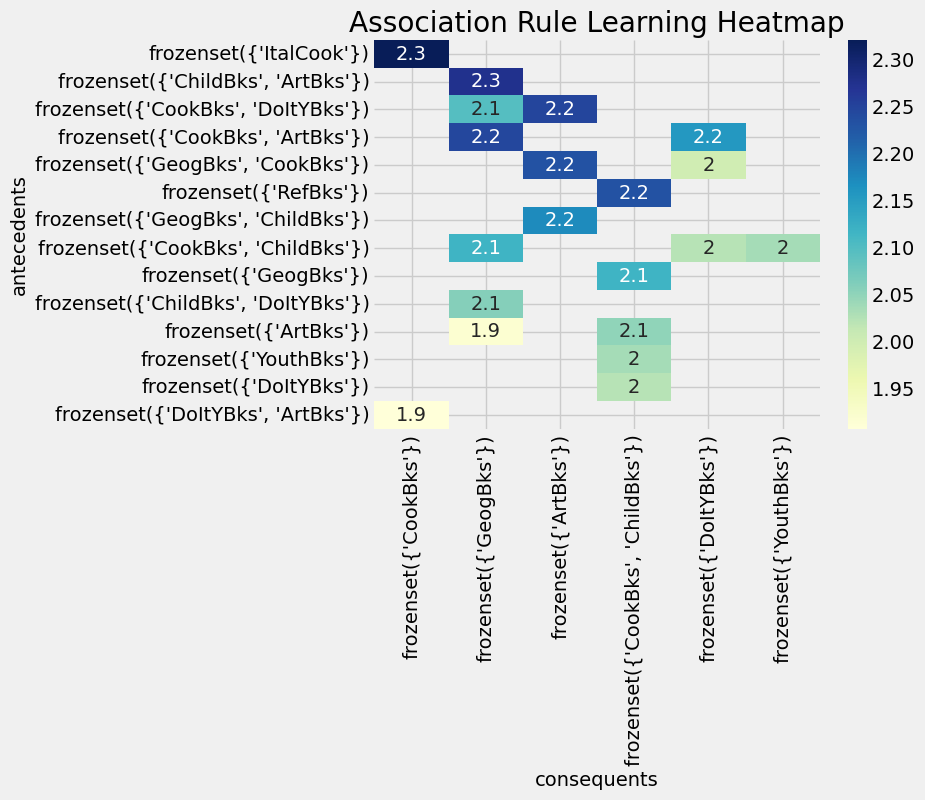

In [23]:
# Plotting a Heatmap for rules with minimum 10% support and 50% confidence

# Getting the top 20 rules for minimum support 10% and confidence 50%
s10c50_top = s10c50.sort_values('lift', ascending=False).head(20)
# Transform data into matrix format
matrix = s10c50_top.pivot_table(index='antecedents', columns='consequents', values='lift')
# Create heatmap of the matrix
sns.heatmap(matrix, cmap='YlGnBu', annot=True)
plt.title('Association Rule Learning Heatmap')
plt.show()

## Low Support / High Confidence

In [24]:
# rules for minimum 10% support and minimum 90% confidence
get_rules(0.1, 0.9)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
46,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf


For smaller support of 11%, we get a rule with total confidence of 100% that states that customers who buy italian cookbooks, buy other general cookbooks too. We can use this by placing these two sections farther apart with consequents of other rules with similar antecedents and support but lower confidence between them

In [25]:
# rules for minimum 5% support and minimum 85% confidence
s5c85 = get_rules(0.05, 0.85)
print('Total rules for 5% support and 85% confidence : ', s5c85.shape[0])
# Checking count of unique values of consequents
print('Value count for consequents : ')
s5c85.consequents.value_counts()

Total rules for 5% support and 85% confidence :  28
Value count for consequents : 


(CookBks)     16
(ChildBks)    12
Name: consequents, dtype: int64

For minimum 5% support and minimum 85% confidence, we have 28 rules. Most of these rules have Cookbooks or Children's books as consequents. The can help if we place these sections near checkout.

#### Visualizations

<Axes: xlabel='support', ylabel='confidence'>

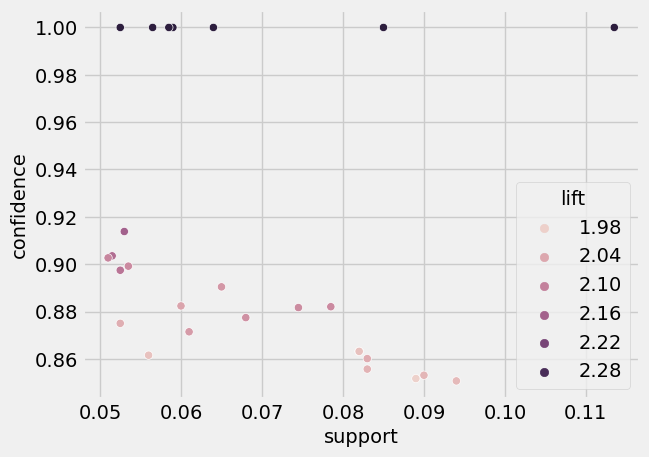

In [26]:
# Scatterplot for minimum 5% support and minimum 85% confidence
sns.scatterplot(s5c85, x = 'support', y = 'confidence', hue = 'lift')

In [27]:
# Rules with minimum 5% support and 100% confidence
s5c85[s5c85.confidence == 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
46,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf
189,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.0,2.320186,0.048365,inf
404,"(YouthBks, ItalCook)",(CookBks),0.0590,0.431,0.0590,1.0,2.320186,0.033571,inf
615,"(ItalCook, DoItYBks)",(CookBks),0.0585,0.431,0.0585,1.0,2.320186,0.033287,inf
681,"(ItalCook, ArtBks)",(CookBks),0.0565,0.431,0.0565,1.0,2.320186,0.032148,inf
704,"(ItalCook, GeogBks)",(CookBks),0.0640,0.431,0.0640,1.0,2.320186,0.036416,inf
1857,"(ItalCook, GeogBks, ChildBks)",(CookBks),0.0525,0.431,0.0525,1.0,2.320186,0.029872,inf


We have 7 rules with maximum confidence and high lift which have Cookbooks as consequents

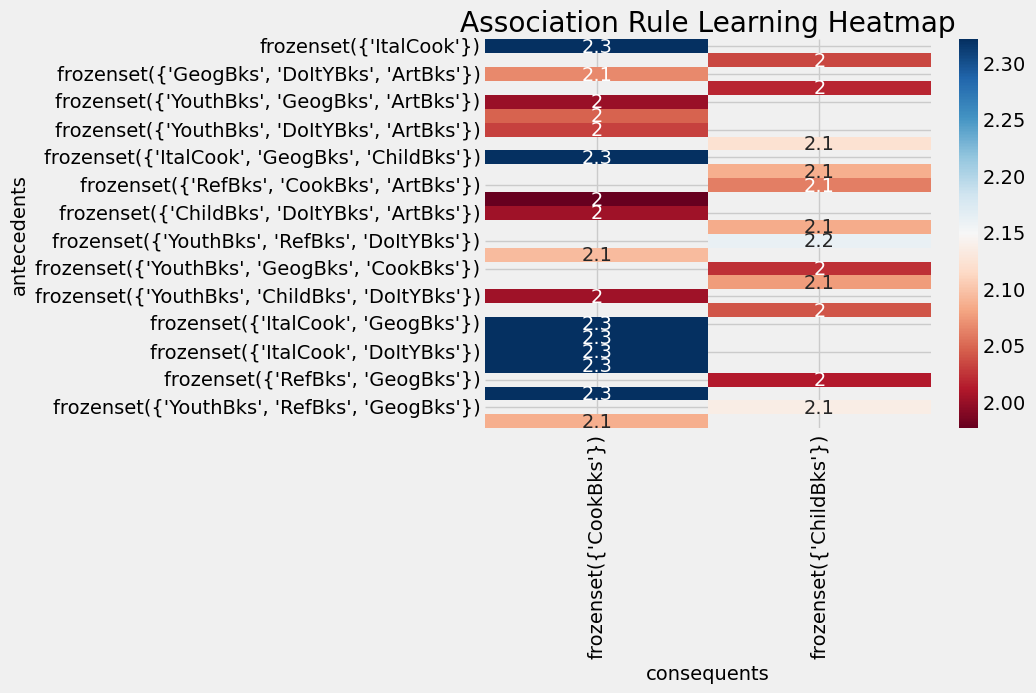

In [28]:
# Heatmap of rules with minimum 5% support and minimum 85% confidence
matrix = s5c85.pivot_table(index='antecedents', columns='consequents', values='lift')
sns.heatmap(matrix, cmap='RdBu', annot=True)
plt.title('Association Rule Learning Heatmap')
plt.show()

## Effect of different Maximum Length on Rule Learning

Text(0.5, 1.0, "Effect of 'max_len' hyperparameter on number of rules generated")

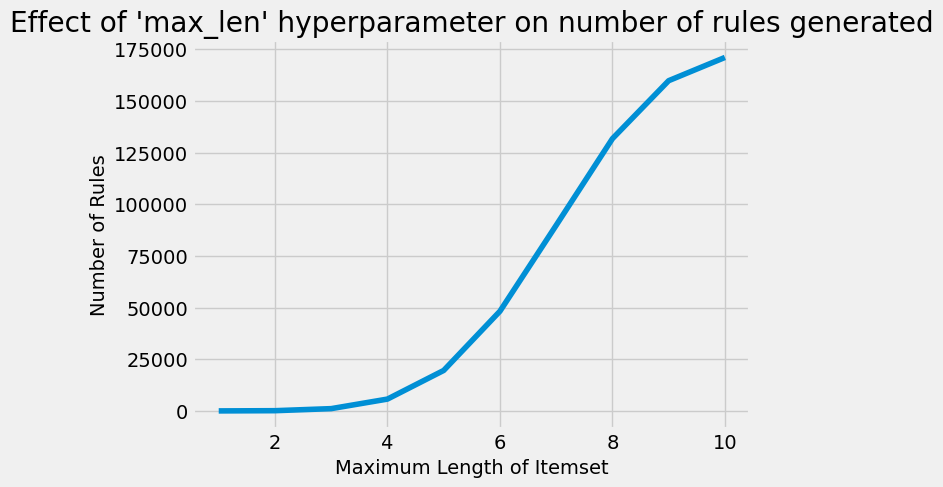

In [29]:
# Plotting change in number of rules as maximum length of itemset increases
n_rules = []
for i in range(1,book.shape[1]):
    ap = apriori(book, use_colnames=True, min_support= 1/2000, max_len = i)
    rules = association_rules(ap, min_threshold = 0)
    n_rules.append(rules.shape[0])
plt.plot(list(range(1,book.shape[1])), n_rules)
plt.xlabel('Maximum Length of Itemset')
plt.ylabel("Number of Rules")
plt.title("Effect of 'max_len' hyperparameter on number of rules generated")

As y axis has a large scale, the number of rules for smaller values of 'max_len' are not clear

In [30]:
# printing a list of number of rules for 'max_len' ranging from 1 to 10
n_rules

[0, 110, 1100, 5720, 19580, 48224, 89804, 131714, 159764, 171006]

We can see that as the lenght of itemset decreases, the number of rules drastically drops. For lenght of 2, we have only 110 rules, and it exponentially increases as the length increases. When itemset is limited to 2, we can only have association between 1 to 1 item. These itemsets are generated during the initial iterations of the apriori algorithm and deal only with associating each item with every other. As we increase itemset size in further iterations, multiple combinations of items are possible and the number of rules generated increases exponentially.

Let us check the rules generated by itemset length of 2

In [31]:
# Generating rules with 1 to 1 association of items
ap = apriori(book, use_colnames=True, min_support= 1/2000, max_len = 2)
rules = association_rules(ap, min_threshold = 0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
105,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
106,(Florence),(ItalAtlas),0.1085,0.0370,0.0065,0.059908,1.619131,0.002485,1.024368
107,(ItalAtlas),(Florence),0.0370,0.1085,0.0065,0.175676,1.619131,0.002485,1.081492
108,(Florence),(ItalArt),0.1085,0.0485,0.0125,0.115207,2.375410,0.007238,1.075393


<Axes: xlabel='support', ylabel='confidence'>

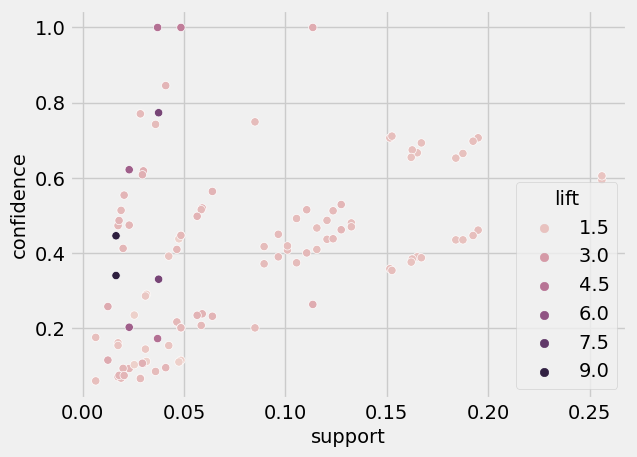

In [32]:
# Scatterplot of 1 to 1 association rules
sns.scatterplot(rules, x = 'support', y = 'confidence', hue = 'lift')

In [33]:
# 1 to 1 association rules with high lift
rules[rules.lift > 6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
100,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
101,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
104,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
105,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341


These rules have very high lift, meaning they are bought together and very infrequently are they bought with any other item